In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import requests
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bidi import algorithm as bidialg

In [3]:
df = pd.read_csv('apartments.csv', index_col=0)
df

,City,Street,Floor,NumOfRooms,Size(SQM),Type,Price(₪)
0,גבעת שמואל,רמת הדר,15,5.5,150,דירה,3895000
1,קרית גת,כרמי גת,1,3.0,80,דירה,1650000
2,חיפה,שדרות הצבי 37,1,5.0,130,דירה,3200000
3,אילת,משעול המערב 6,2,4.0,99,דירה,1650000
5,שדרות,משעול פינס 5,0,4.0,270,דירת גן,1550000
...,...,...,...,...,...,...,...
8495,קרית מוצקין,יהודה הלוי,0,3.0,85,דירת גן,1190000
8496,ראשון לציון,נווה חוף,22,6.0,230,גג/פנטהאוז,5420000
8497,ירושלים,השיירות,2,3.5,75,דירה,3150000
8499,הרצליה,עזרא הסופר,4,4.0,108,דירה,4090000


In [4]:
#DataFrame of central cities in Israel
dfCentralCities = df[df['City'] == ' תל אביב יפו']
dfCentralCities = dfCentralCities.append(df[df['City'] == ' חיפה'])
dfCentralCities = dfCentralCities.append(df[df['City'] == ' ירושלים'])
dfCentralCities = dfCentralCities.append(df[df['City'] == ' אילת'])
dfCentralCities = dfCentralCities.append(df[df['City'] == ' עכו'])
dfCentralCities = dfCentralCities.append(df[df['City'] == ' באר שבע'])
dfCentralCities

C:\Users\Alex\AppData\Local\Temp\ipykernel_11948\2902332819.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCentralCities = dfCentralCities.append(df[df['City'] == ' חיפה'])
C:\Users\Alex\AppData\Local\Temp\ipykernel_11948\2902332819.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCentralCities = dfCentralCities.append(df[df['City'] == ' ירושלים'])
C:\Users\Alex\AppData\Local\Temp\ipykernel_11948\2902332819.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCentralCities = dfCentralCities.append(df[df['City'] == ' אילת'])
C:\Users\Alex\AppData\Local\Temp\ipykernel_11948\2902332819.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,City,Street,Floor,NumOfRooms,Size(SQM),Type,Price(₪)
12,תל אביב יפו,שקד 15,7,3.0,90,דירה,2590000
22,תל אביב יפו,אלנבי,2,3.0,70,דירה,3000000
32,תל אביב יפו,הצפון הישן - צפון,7,5.5,195,גג/פנטהאוז,10390000
33,תל אביב יפו,יהודה הימית,3,3.5,120,דירה,3950000
79,תל אביב יפו,נאות אפקה ב',8,5.0,240,גג/פנטהאוז,9625000
...,...,...,...,...,...,...,...
8402,באר שבע,הנדיב 10,1,2.5,45,דירה,740000
8420,באר שבע,הנרי קנדל 14,12,4.0,148,דירה,1650000
8442,באר שבע,אריה דולצ'ין 11,5,4.0,96,דירה,1050000
8445,באר שבע,אברהם אבינו,2,3.0,67,דירה,910000


In [5]:
dfNum = df[['Floor', 'NumOfRooms', 'Size(SQM)', 'Price(₪)']]
dfNum.corr()

,Floor,NumOfRooms,Size(SQM),Price(₪)
Floor,1.000000,0.134090,0.133974,0.260507
NumOfRooms,0.134090,1.000000,0.657972,0.321772
Size(SQM),0.133974,0.657972,1.000000,0.458290
Price(₪),0.260507,0.321772,0.458290,1.000000


Text(0.5, 1.0, 'Correlations of numeric attributes:  Floor, NumOfRooms, Size(SQM) and Price(₪)')

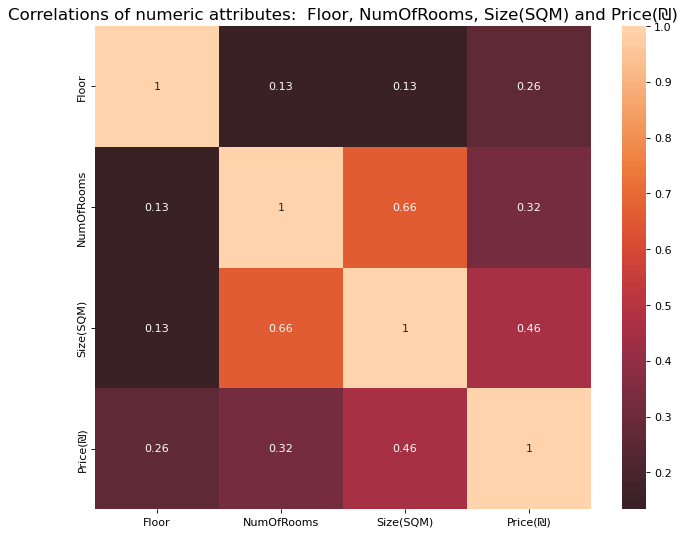

In [6]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(dfNum.corr(), xticklabels=dfNum.corr().columns, yticklabels=dfNum.corr().columns, center=0, annot=True)
plt.title('Correlations of numeric attributes:  Floor, NumOfRooms, Size(SQM) and Price(₪)', fontsize=15)

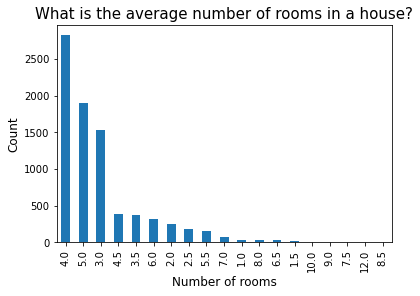

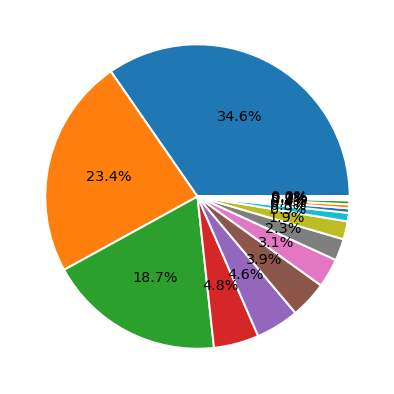

In [8]:
df['NumOfRooms'].value_counts().plot(kind='bar')
plt.title('What is the average number of rooms in a house?', size=15)
plt.xlabel('Number of rooms',size=12)
plt.ylabel('Count',size=12)
plt.show()

fig = plt.figure(figsize =(10, 7))
plt.pie(df['NumOfRooms'].value_counts(), autopct='%.1f%%',  wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, textprops={'size': 'x-large'})
plt.show()

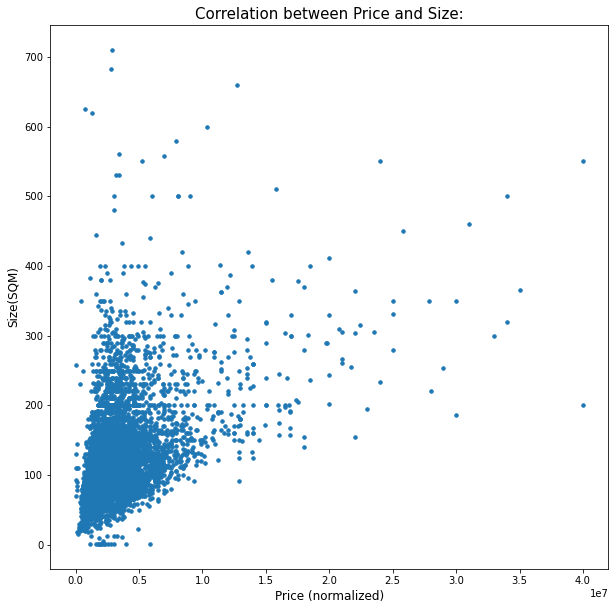

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price(₪)'], df['Size(SQM)'], s=12)
plt.title('Correlation between Price and Size:',size=15)
plt.ylabel('Size(SQM)',size=12)
plt.xlabel('Price (normalized)',size=12)
plt.show()

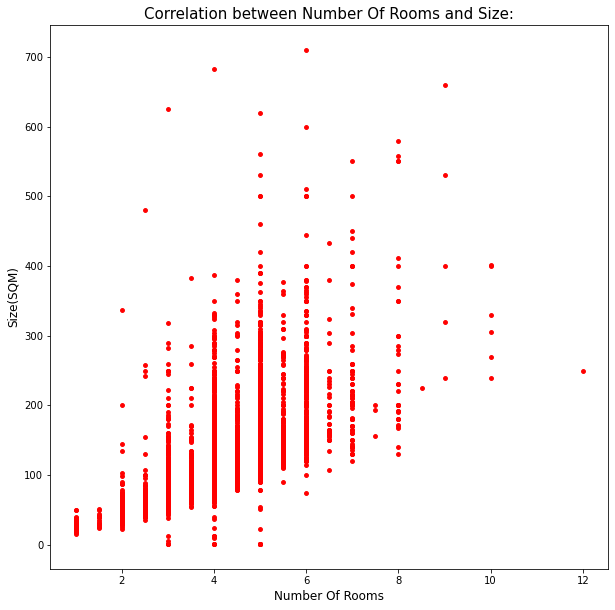

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df['NumOfRooms'], df['Size(SQM)'], s=15, c='red', marker='o')
plt.title('Correlation between Number Of Rooms and Size:',size=15)
plt.ylabel('Size(SQM)',size=12)
plt.xlabel('Number Of Rooms',size=12)
plt.show()

In [11]:
#Separete Dataframe of all 4-room apartments if the central cities:
df4Rooms = dfCentralCities[dfCentralCities['NumOfRooms']==4]
df4Rooms

,City,Street,Floor,NumOfRooms,Size(SQM),Type,Price(₪)
87,תל אביב יפו,מנדלי מוכר ספרים 14,4,4.0,103,דירה,6100000
100,תל אביב יפו,ניסים אלוני,5,4.0,105,דירה,5650000
103,תל אביב יפו,דקל,3,4.0,80,דירה,2800000
126,תל אביב יפו,ענתות 35,4,4.0,110,דירה,4400000
144,תל אביב יפו,בני אפרים,2,4.0,110,דירה,4500000
...,...,...,...,...,...,...,...
8258,באר שבע,חביבה רייק,1,4.0,80,דירה,850000
8378,באר שבע,עוזיה המלך,2,4.0,96,דירה,1030000
8420,באר שבע,הנרי קנדל 14,12,4.0,148,דירה,1650000
8442,באר שבע,אריה דולצ'ין 11,5,4.0,96,דירה,1050000


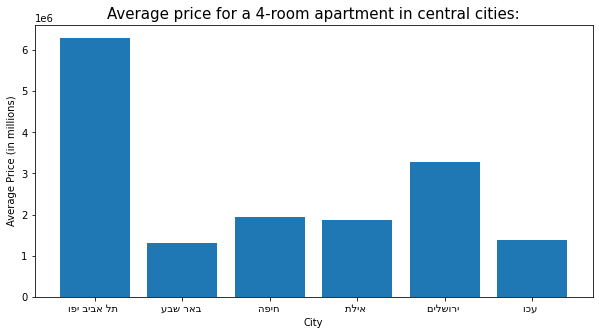

In [12]:
dfTel_Aviv = df4Rooms[df4Rooms['City']== ' תל אביב יפו']
tel_aviv_mean = dfTel_Aviv['Price(₪)'].mean()

dfBeer_Sheva = df4Rooms[df4Rooms['City']== ' באר שבע']
beer_sheva_mean = dfBeer_Sheva['Price(₪)'].mean()

dfHaifa = df4Rooms[df4Rooms['City']== ' חיפה']
haifa_mean = dfHaifa['Price(₪)'].mean()

dfEilat = df4Rooms[df4Rooms['City']== ' אילת']
eilat_mean = dfEilat['Price(₪)'].mean()

dfJerusalem = df4Rooms[df4Rooms['City']== ' ירושלים']
jerusalem_mean = dfJerusalem['Price(₪)'].mean()

dfAcre = df4Rooms[df4Rooms['City']== ' עכו']
Acre_mean = dfAcre['Price(₪)'].mean()

cities = [' תל אביב יפו', ' באר שבע', ' חיפה', ' אילת', ' ירושלים', ' עכו']
mean_prices = [tel_aviv_mean, beer_sheva_mean, haifa_mean, eilat_mean, jerusalem_mean, Acre_mean]

#Since we wrote the names of the cities in hebrew he had to swap the direction of the words.
for i in range(len(cities)):
    cities[i] = bidialg.get_display(cities[i])

fig = plt.figure(figsize = (10, 5))
plt.bar(cities,mean_prices)
plt.title('Average price for a 4-room apartment in central cities:', size=15)
plt.xlabel('City')
plt.ylabel('Average Price (in millions)')
plt.show()

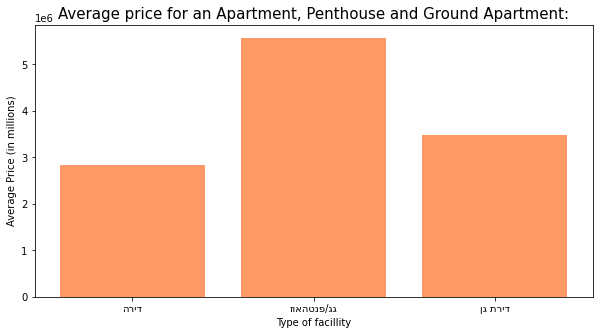

In [13]:
dfApartment = df[df['Type']== 'דירה']
dfPenthouse = df[df['Type']== 'גג/פנטהאוז']
dfGround = df[df['Type']== 'דירת גן']

mean_apartment = dfApartment['Price(₪)'].mean()
mean_penthouse = dfPenthouse['Price(₪)'].mean()
mean_ground = dfGround['Price(₪)'].mean()

types = ['דירה', 'גג/פנטהאוז', 'דירת גן']
mean_price = [mean_apartment, mean_penthouse, mean_ground]

for i in range(len(types)):
    types[i] = bidialg.get_display(types[i])
    
fig = plt.figure(figsize = (10, 5))
plt.bar(types,mean_price, color='#ff9966')
plt.title('Average price for an Apartment, Penthouse and Ground Apartment:', size=15)
plt.xlabel('Type of facillity')
plt.ylabel('Average Price (in millions)')
plt.show()